In [1]:
import sys
sys.path.append('..')

In [2]:
import TechCore.Simulator.simulator_optimized as simulator
import TechCore.Strategies.ML_Strategies.ML_Stoikov as Stoikov
import TechCore.Simulator.get_info as get_info
import TechCore.Simulator.load_data as load_data

from importlib import reload

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path_to_file = '../TechCore/Data/marketdata_final/ethusdt_Binance_LinearPerpetual/'
run_time = pd.Timedelta(24, 'h').delta

In [3]:
reload(simulator)
reload(Stoikov)
reload(get_info)
reload(load_data)

<module 'TechCore.Simulator.load_data' from 'C:\\Users\\artem\\.Computer Science\\CMF\\Projects\\High_Frequency_Market_Making\\TechCore\\Simulator\\load_data.py'>

In [4]:
md = load_data.load_md_from_file(path=path_to_file, run_time=run_time)

In [5]:
latency = pd.Timedelta(10, 'ms').delta
md_latency = pd.Timedelta(10, 'ms').delta

sim = simulator.SimOptim(md, latency, md_latency)

In [6]:
#delay between orders
delay = pd.Timedelta(0.1, 's').delta

strategy = Stoikov.Strategy(
    delay=delay,
    risk_koef=10,
    order_fees=-0.00004,
    min_asset_value=0.001,
)

In [7]:
trades_list, md_list, updates_list, all_orders = strategy.run(sim)

In [8]:
logs = strategy.logs

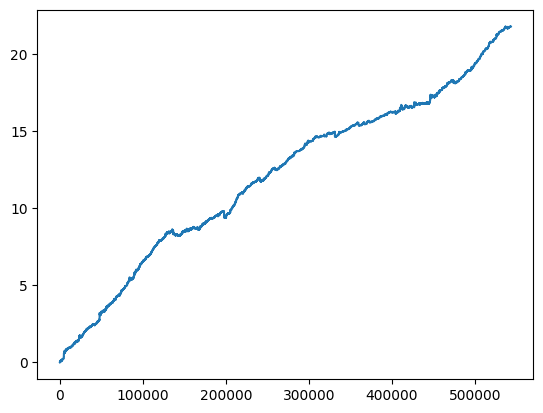

In [9]:
plt.plot(logs['pnl'])

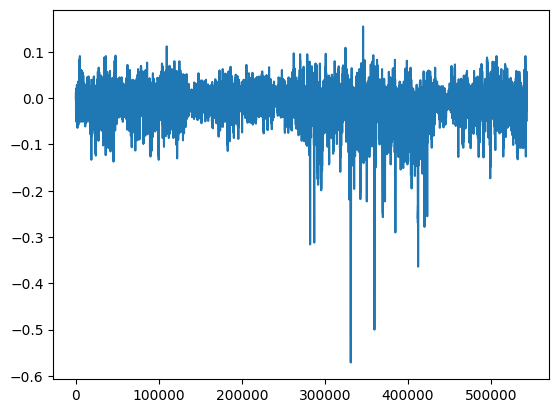

In [10]:
plt.plot(logs['asset_position'])

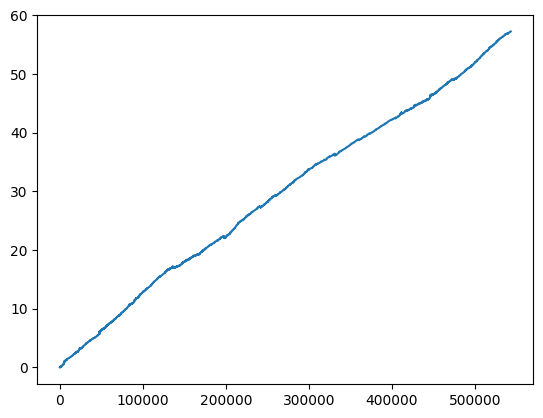

In [11]:
plt.plot(logs['pnl_with_liq'])

In [20]:
def MaximumDrawdown(pnl):
    # = min(1 - pnl(i)/pnl(j)) : j > i
    Roll_Max = pnl.cummax()
    Drawdown = pnl/Roll_Max - 1

    return Drawdown[10000:].min()

MaximumDrawdown(pd.Series(logs['pnl_with_liq']))

-0.04087020822477472

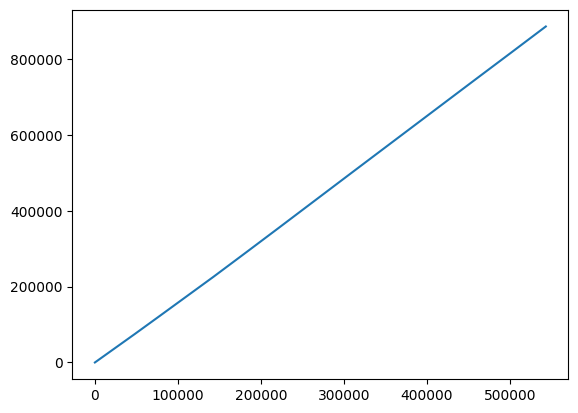

In [13]:
plt.plot(logs['total_liq'])

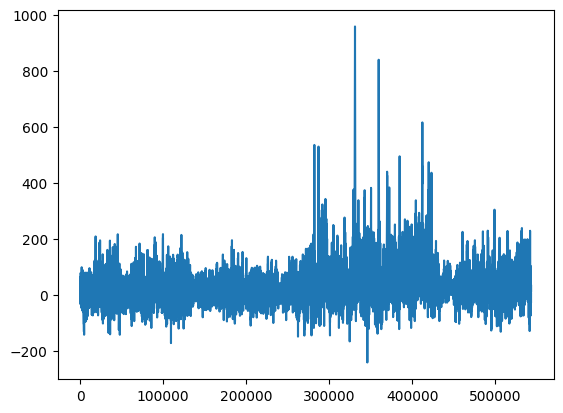

In [14]:
plt.plot(logs['usd_position'])

In [15]:
df = pd.DataFrame({
    'pnl': logs['pnl_with_liq']
})

In [16]:
df['return'] = np.log(df['pnl']/df['pnl'].shift(1))
df = df.dropna()

C:\Users\artem\anaconda3\envs\workspace\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
